TensorFlow 버전 2.x 선택

In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
print(tf.__version__)

2.1.0


In [0]:
import keras
print(keras.__version__)

2.2.5





1.   MNIST 데이터 로딩





In [0]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [0]:
# 데이터 구조 확인
print(f'X_train: {X_train.shape}, Y_train: {Y_train.shape}')
print(f'X_test: {X_test.shape}, Y_test: {Y_test.shape}')

X_train: (60000, 28, 28), Y_train: (60000,)
X_test: (10000, 28, 28), Y_test: (10000,)


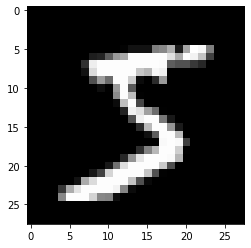

In [0]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.show()



2.   데이터 전처리



In [0]:
# Neural Network에 전송할 때 이미지는 1차원이어야 함.
# 3차원 학습 데이터(samples, height, width)를 
# 2차원 데이터(sampels, height * width) 모양으로 변환함.
n, h, w = X_train.shape
X_train = X_train.reshape(n, h * w)
print('X_train:', X_train.shape)

X_train: (60000, 784)


In [0]:
# X_test 데이터를 (samples, height * width) 모양으로 변환.
nt, ht, wt = X_test.shape
X_test = X_test.reshape(nt, ht * wt)
print('X_test:', X_test.shape)

X_test: (10000, 784)


In [0]:
print(X_train[0])  # 이미지 데이터의 값 확인

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

이미지 데이터는 0 ~ 255 사이의 값들로 저장되어 있음. 신경망에 보낼 때는 정규화된 값(0. ~ 1.)으로 보내면 더 좋은 성능이 나올 수도 있음.

In [0]:
X_train = X_train.astype('float16') / 255
X_test = X_test.astype('float16') / 255

In [0]:
print(Y_train[0])  # 레이블(클래스)은 one-hot encoding이 아님.

5


In [0]:
# 학습/테스트 레이블을 one-hot encoding 적용
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, 10, dtype='float16')
Y_test = to_categorical(Y_test, 10, dtype='float16')
print(Y_train[0], Y_test[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]




3.   1층 Neural Network 생성




In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Sequential 클래스 인스턴스 생성 - 생성자(constructor) 호출
model = Sequential()  # 신경망 모델

# Dense(fully-connected layer, 완전연결 층)을 생성하고,
# 신경망에 은닉층으로 추가
model.add(Dense(512, input_dim=h*w, activation='relu'))
# 512: 은닉층의 뉴런 개수

# 출력층(output layer)을 신경망에 추가 
model.add(Dense(10, activation='softmax'))

In [0]:
# 신경망 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
# 모델 최적화 - epoch를 반복할 때, 10회 epoch 동안 성능 향상이 없으면,
# 자동으로 학습 중단(epoch 중단)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',
                           patience=10)

# 신경망 모델 학습 실행
history = model.fit(X_train, Y_train,
                    batch_size=200,
                    epochs=50,
                    verbose=1,
                    callbacks=[early_stop],
                    validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3019 - accuracy: 0.9148 - val_loss: 0.1513 - val_accuracy: 0.9569
Epoch 2/50
60000/60000 [==============================] - 4s 63us/sample - loss: 0.1251 - accuracy: 0.9645 - val_loss: 0.1055 - val_accuracy: 0.9685
Epoch 3/50
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0830 - accuracy: 0.9757 - val_loss: 0.0796 - val_accuracy: 0.9752
Epoch 4/50
60000/60000 [==============================] - 4s 59us/sample - loss: 0.0598 - accuracy: 0.9826 - val_loss: 0.0743 - val_accuracy: 0.9767
Epoch 5/50
60000/60000 [==============================] - 4s 60us/sample - loss: 0.0446 - accuracy: 0.9875 - val_loss: 0.0691 - val_accuracy: 0.9776
Epoch 6/50
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0347 - accuracy: 0.9906 - val_loss: 0.0642 - val_accuracy: 0.9802
Epoch 7/50
60000/60000 [==============================] 

In [0]:
# 테스트 정확도 출력
acc = model.evaluate(X_test, Y_test)
# evaluate 메소드는 [loss, accuracy] 리스트를 리턴함.
print('테스트 정확도:', acc[1])

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0616 - accuracy: 0.9835
테스트 정확도: 0.9835


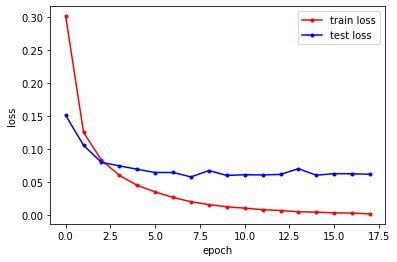

In [0]:
# 각 epoch에서 손실 그래프
# 학습 세트 손실
train_loss = history.history['loss']
# 테스트 세트 손실
test_loss = history.history['val_loss']

# x좌표 - epoch 회수
x = range(len(train_loss))
plt.plot(x, train_loss, label='train loss', c='red', marker='.')
plt.plot(x, test_loss, label='test loss', c='blue', marker='.')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
